# Modelos Lineales

**Actividad 5**

Alicia Christyna Martínez Parra

In [59]:
import pandas as pd
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from utils import path_loader as p
import seaborn as sns

In [60]:
# Load csv file
try:
    df = pd.read_csv(p.generate_file_path(
        file_name='avocado_prices_processed', file_extension='csv', directory='output'))

    n_row, n_col = df.shape
    print(f'CSV File loaded succesfully!\nThere are {n_row} rows and {n_col} columns')
except Exception as e:
    print(f'Something wrong happended!: {e}')

CSV File loaded succesfully!
There are 18249 rows and 13 columns


In [61]:
# Stepwise regression function
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05):
    included = list(initial_list)
    while True:
        changed = False
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(
                pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True

        # Backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]  # Exclude intercept
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)

        if not changed:
            break

    return included

In [62]:
# Removing non-numeric columns and 'year'
columns_to_include = ['total_volume', '4046', '4225', '4770',
                      'total_bags', 'small_bags', 'large_bags', 'x_large_bags']
X = df[columns_to_include]
y = df["average_price"]

# Adding a constant for the intercept
X = sm.add_constant(X)

# Performing stepwise regression
selected_features = stepwise_selection(X, y)

# Fit the final model
final_model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
final_model_summary = final_model.summary()

selected_features

['const', '4046', '4225', '4770', 'x_large_bags', 'large_bags']

In [63]:
final_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          average_price   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     196.0
Date:                Fri, 22 Nov 2024   Prob (F-statistic):          4.15e-204
Time:                        15:03:02   Log-Likelihood:                -8816.6
No. Observations:               18249   AIC:                         1.765e+04
Df Residuals:                   18243   BIC:                         1.769e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4237      0.003    475.710      0.000       1.418       1.430
4046         -1.042e-07   6.69e-09    -15.568      0.000   -1.17e-07   -9.11e-08
4225          8.051e-08   7.86e-09     10.246      0.000    6.51e-08    9.59e-08
4770         -5.024e-07   6.11e-08     -8.230      0.000   -6.22e-07   -3.83e-07
x_large_bags   1.68e-06   2.51e-07      6.685      0.000    1.19e-06    2.17e-06
large_bags   -8.623e-08   2.36e-08     -3.648      0.000   -1.33e-07   -3.99e-08
==============================================================================
Omnibus:                     1105.666   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1322.151
Skew:                           0.629   Prob(JB):                    7.92e-288
Kurtosis:                       3.394   Cond. No.                     1.83e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
# Calculating R-squared for each independent variable
r_squared_values = {}

for column in columns_to_include:
    model = sm.OLS(y, sm.add_constant(X[[column]])).fit()
    r_squared_values[column] = model.rsquared

# Convert to DataFrame for better display
r_squared_df = pd.DataFrame(list(r_squared_values.items()), columns=['Feature', 'R-Squared'])
r_squared_df = r_squared_df.sort_values(by='R-Squared', ascending=False)

r_squared_df

,Feature,R-Squared
1,4046,0.043396
0,total_volume,0.037153
3,4770,0.032201
4,total_bags,0.031360
5,small_bags,0.030530
6,large_bags,0.029908
2,4225,0.029904
7,x_large_bags,0.013828


In [65]:
# Selecting the feature with the highest R-squared value
highest_r2_feature = r_squared_df.iloc[0]['Feature']

# Performing simple linear regression with the highest R-squared feature
highest_r2_model = sm.OLS(y, sm.add_constant(X[[highest_r2_feature]])).fit()
highest_r2_model_summary = highest_r2_model.summary()

highest_r2_feature

'4046'

In [66]:
highest_r2_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          average_price   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     827.8
Date:                Fri, 22 Nov 2024   Prob (F-statistic):          4.59e-178
Time:                        15:03:02   Log-Likelihood:                -8889.2
No. Observations:               18249   AIC:                         1.778e+04
Df Residuals:                   18247   BIC:                         1.780e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4254      0.003    476.294      0.000       1.420       1.431
4046       -6.631e-08    2.3e-09    -28.771      0.000   -7.08e-08   -6.18e-08
==============================================================================
Omnibus:                     1022.391   Durbin-Watson:                   0.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1206.199
Skew:                           0.603   Prob(JB):                    1.19e-262
Kurtosis:                       3.364   Cond. No.                     1.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

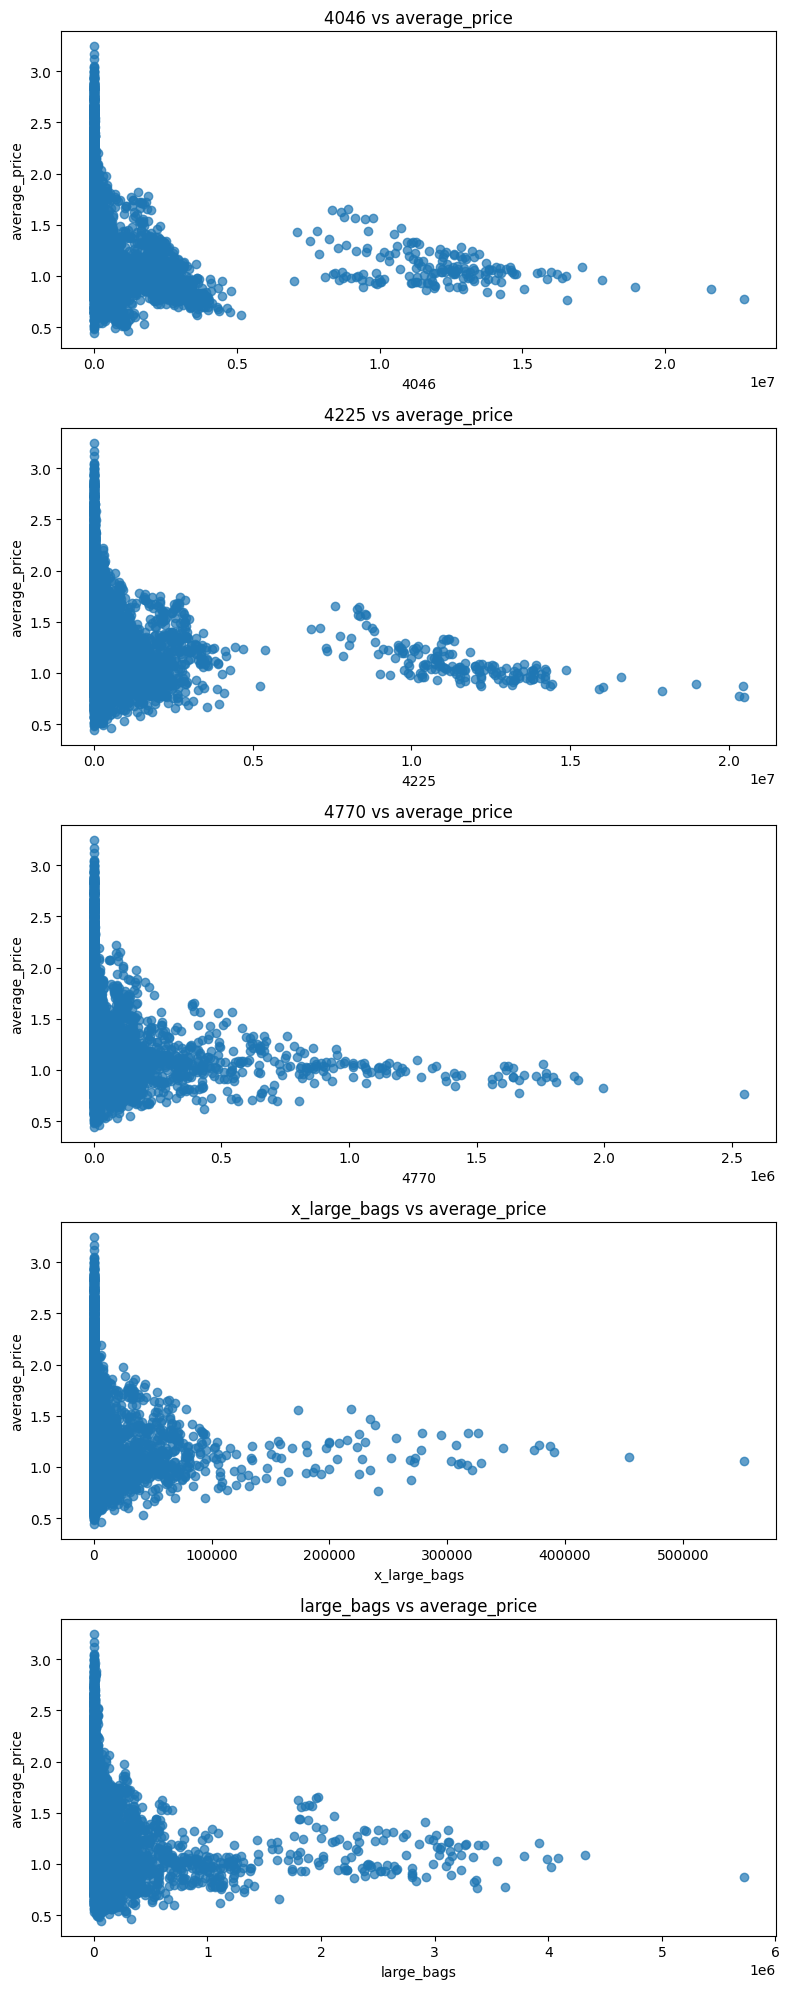

In [67]:
scatter_cols = ['4046', '4225', '4770', 'x_large_bags', 'large_bags']
fig, axes = plt.subplots(len(scatter_cols), 1, figsize=(8, len(scatter_cols) * 4))

for i, col in enumerate(scatter_cols):
    ax = axes[i]
    ax.scatter(df[col], df['average_price'], alpha=0.7)
    ax.set_title(f'{col} vs average_price')
    ax.set_xlabel(col)
    ax.set_ylabel('average_price')

plt.tight_layout()
plt.show()

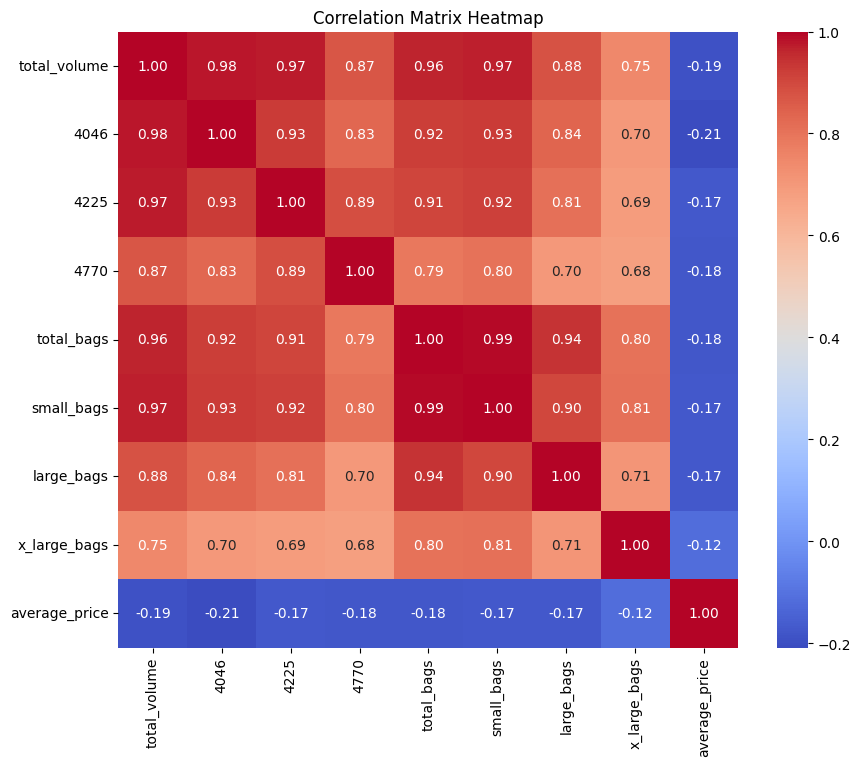

,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,x_large_bags,average_price
total_volume,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.192752
4046,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.208317
4225,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.172928
4770,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.179446
total_bags,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.177088
small_bags,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.174730
large_bags,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.172940
x_large_bags,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.117592
average_price,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,1.000000


In [68]:
# Creating the correlation matrix including the target variable 'AveragePrice'
corr_matrix = df[columns_to_include + ['average_price']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

corr_matrix